In this notebook, i am trying to solve problem 4.9 from Sutton and Barto's textbook, which demands solving the gambler's problem using the policy iteration method. All of the configs are based on the assumptions of the exercise.

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
n = 100
v = np.zeros(n+1) #Creating dummy vector for saving value states
v[n] = 1 #Based on the text 'The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.'
policy = np.zeros(n+1)

In [87]:
def policy_evaluation(v, policy, theta, p_head):
  while True:
    delta = 0
    for s in range (1, n):
      old_v = v[s]
      a = int(policy[s])
      v[s] = p_head * v[s+a] + (1-p_head) * v[s-a]
      delta = max(delta, abs(v[s] - old_v))

    if delta < theta:
      break

  return v

def policy_improvement(v, policy, theta, p_head):

  policy_stable = True

  for s in range(1, n+1):
    max_action = min(s, n-s)
    A = np.zeros(max_action+1)
    old_policy = policy[s]
    for a in range(1, min(s, n - s) + 1):
      A[a] = p_head * v[s+a] + (1 - p_head) * v[s-a]
    policy[s] = np.argmax(A)

    if old_policy != policy[s]:
      policy_stable = False

  if policy_stable!= True:
    policy_evaluation(v, policy, theta, p_head)
    policy_improvement(v, policy, theta, p_head)

  else:
    print('Policy stable')
    return v, policy


Policy stable


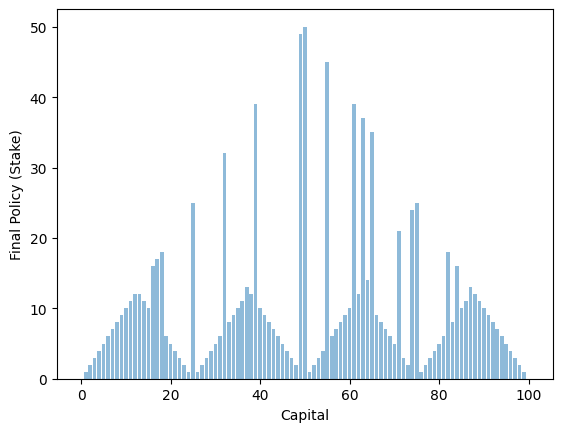

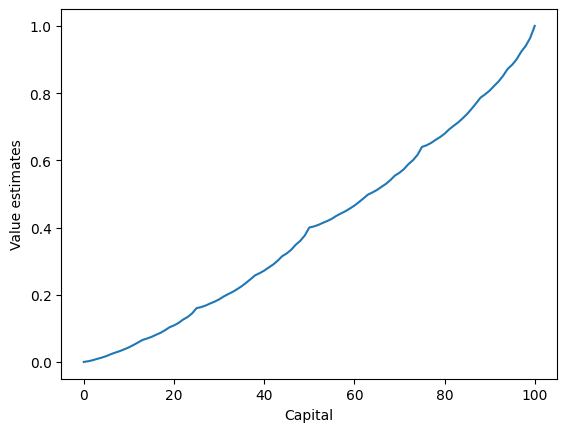

In [89]:
v, policy = policy_improvement(v, policy, 1e-50, p_head = 0.4)

x = range(n+1)
plt.bar(x, policy, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
plt.show()

plt.plot(v)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

Policy stable


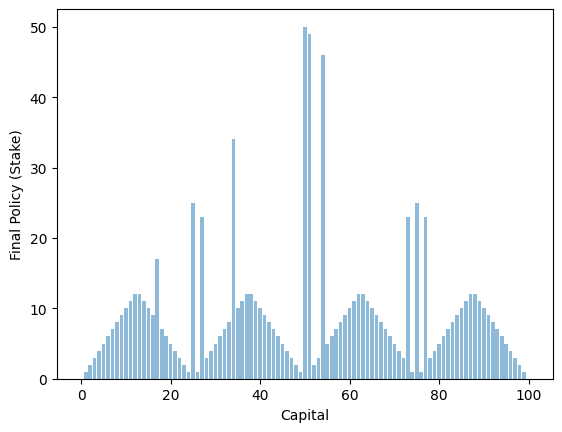

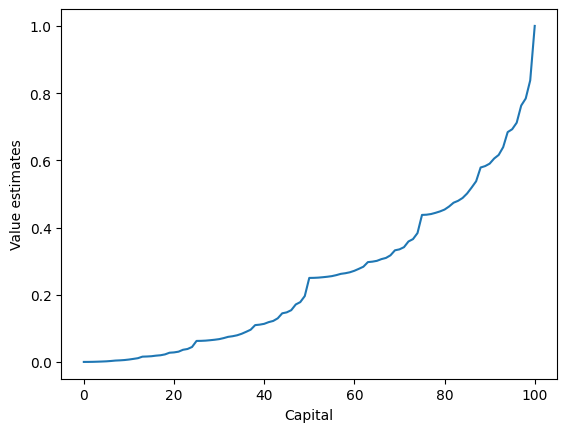

In [91]:
v, policy = policy_improvement(v, policy, 1e-50, p_head = 0.25)

x = range(n+1)
plt.bar(x, policy, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
plt.show()

plt.plot(v)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()